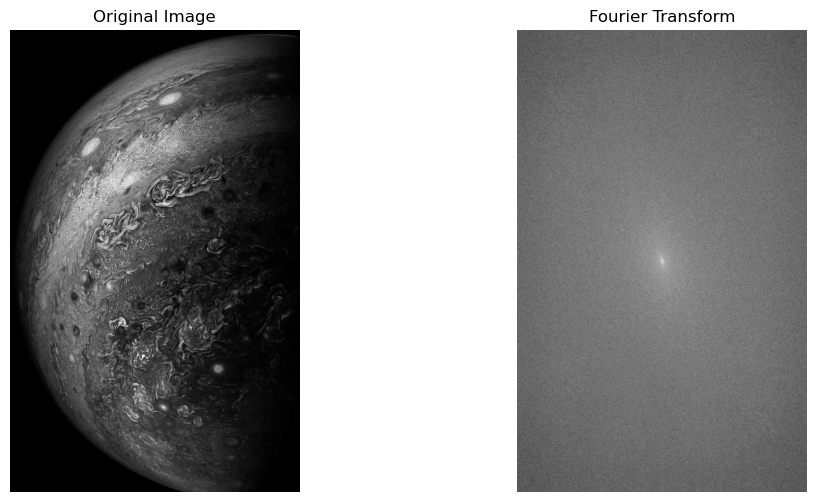

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13816\3195590661.py:36: RuntimeWarning: invalid value encountered in sqrt
  distance = np.sqrt(X*2 + Y*2)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13816\3195590661.py:56: RuntimeWarning: invalid value encountered in sqrt
  distance = np.sqrt(X*2 + Y*2)


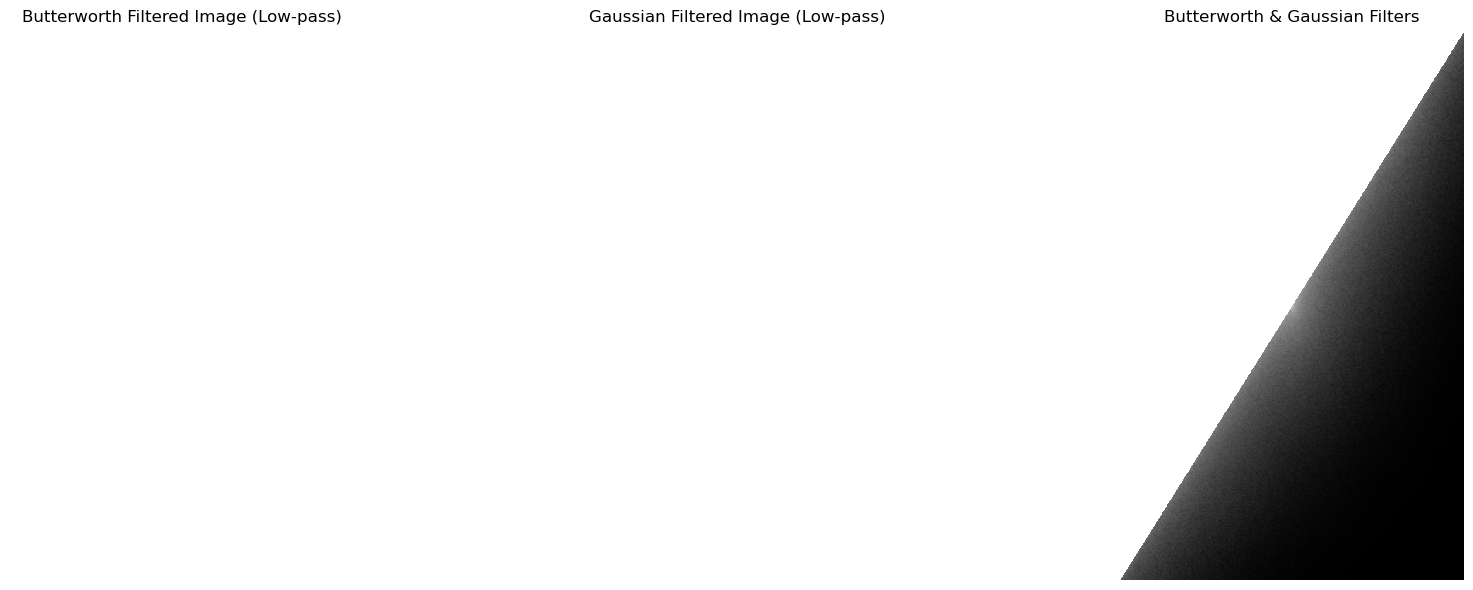

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.fft import fftshift, fft2, ifft2
from scipy.ndimage import gaussian_filter

# Load an image and convert it to grayscale
image_path = "C:\\Users\\ASUS\\Downloads\\img2.jpg"
image = Image.open(image_path).convert('L')
image_np = np.array(image, dtype=np.float32)

# Perform Fourier Transform
f_transform = fft2(image_np)
f_transform_shifted = fftshift(f_transform)  # Shift zero frequency to center
magnitude_spectrum = np.log(1 + np.abs(f_transform_shifted))

# Display the original and Fourier-transformed images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_np, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Fourier Transform")
plt.axis('off')
plt.show()

# Function to create a Butterworth filter
def butterworth_filter(shape, cutoff, order, highpass=True):
    rows, cols = shape
    x = np.linspace(-0.5, 0.5, cols)
    y = np.linspace(-0.5, 0.5, rows)
    X, Y = np.meshgrid(x, y)
    distance = np.sqrt(X*2 + Y*2)
    if highpass:
        filter = 1 - 1 / (1 + (distance / cutoff)**(2 * order))
    else:
        filter = 1 / (1 + (distance / cutoff)**(2 * order))
    return filter

# Apply a Butterworth Filter (Low-pass)
cutoff = 0.05  # Adjust cutoff frequency
order = 2  # Adjust filter order
butterworth_filter_lowpass = butterworth_filter(image_np.shape, cutoff, order, highpass=False)
filtered_image_butterworth = f_transform_shifted * butterworth_filter_lowpass
inverse_butterworth = np.abs(ifft2(np.fft.ifftshift(filtered_image_butterworth)))

# Function to apply a Gaussian filter in the frequency domain
def gaussian_filter_frequency(shape, cutoff, highpass=True):
    rows, cols = shape
    x = np.linspace(-0.5, 0.5, cols)
    y = np.linspace(-0.5, 0.5, rows)
    X, Y = np.meshgrid(x, y)
    distance = np.sqrt(X*2 + Y*2)
    if highpass:
        filter = 1 - np.exp(-(distance*2) / (2 * (cutoff*2)))
    else:
        filter = np.exp(-(distance*2) / (2 * (cutoff*2)))
    return filter

# Apply a Gaussian Filter (Low-pass)
cutoff = 0.05  # Adjust cutoff frequency
gaussian_filter_lowpass = gaussian_filter_frequency(image_np.shape, cutoff, highpass=False)
filtered_image_gaussian = f_transform_shifted * gaussian_filter_lowpass
inverse_gaussian = np.abs(ifft2(np.fft.ifftshift(filtered_image_gaussian)))

# Display results
plt.figure(figsize=(18, 6))

# Original Fourier spectrum
plt.subplot(1, 3, 1)
plt.title("Butterworth Filtered Image (Low-pass)")
plt.imshow(inverse_butterworth, cmap='gray')
plt.axis('off')

# Butterworth filtered result
plt.subplot(1, 3, 2)
plt.title("Gaussian Filtered Image (Low-pass)")
plt.imshow(inverse_gaussian, cmap='gray')
plt.axis('off')

# Gaussian filtered result
plt.subplot(1, 3, 3)
plt.title("Butterworth & Gaussian Filters")
plt.imshow(np.log(1 + np.abs(f_transform_shifted * (butterworth_filter_lowpass + gaussian_filter_lowpass))), cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()